<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns; sns.set()
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




## **Problem 1**

**Load** **&** **Preprocess** **Data**

In [ ]:
file_path = '/content/drive/My Drive/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

# replace 'M' with 1 and 'B' with 0
dataset.iloc[:, 1] = dataset.iloc[:, 1].replace({'M': 1, 'B': 0})
# save  modified data to the CSV file
dataset.to_csv('cancer.csv', index=False)

# features
x = dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17.18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
# target
y = dataset.iloc[:, 1].values
# standardize the features
x = StandardScaler().fit_transform(x)

<ipython-input-136-583d8e7112b1>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 1] = dataset.iloc[:, 1].replace({'M': 1, 'B': 0})


**PCA feature extraction & determining optimal K value**

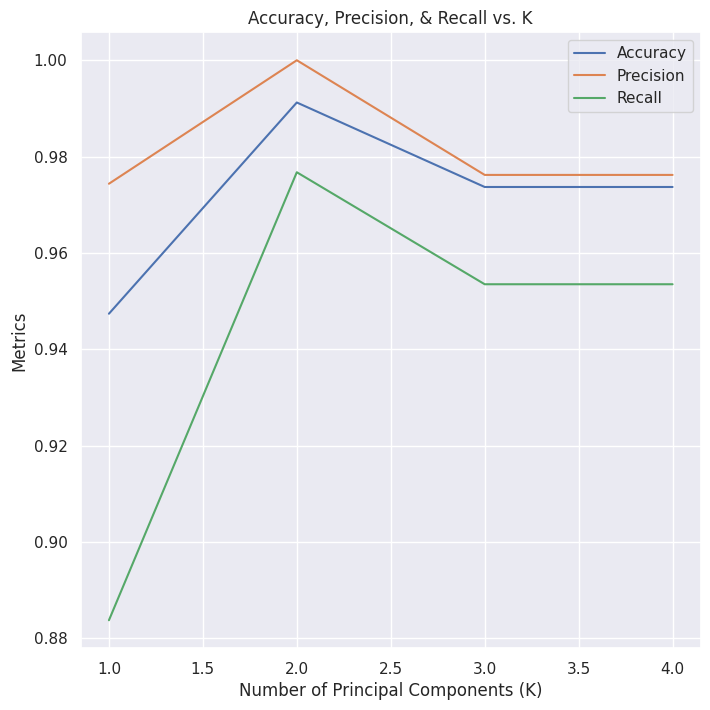

Opmtimal K: 2, Accuracy: 0.9912280701754386


In [ ]:
# range of K values to test
K_values = range(1, 5)

# lists to store results
accuracy_list = []
precision_list = []
recall_list = []

for K in K_values:
    # PCA with K components
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(x)

    # split data 80% training and 20% testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # train an SVM classifier
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)


# plot classification accuracy, precision, and recall over different K values
plt.figure(figsize=(8, 8))
plt.plot(K_values, accuracy_list, label='Accuracy')
plt.plot(K_values, precision_list, label='Precision')
plt.plot(K_values, recall_list, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, & Recall vs. K')
plt.legend()
plt.show()

# the optimum K with the highest accuracy
optimal_K = K_values[accuracy_list.index(max(accuracy_list))]
optimal_accuracy = max(accuracy_list)

print(f"Opmtimal K: {optimal_K}, Accuracy: {optimal_accuracy}")

**Kernel tricks to capture non-linearities**



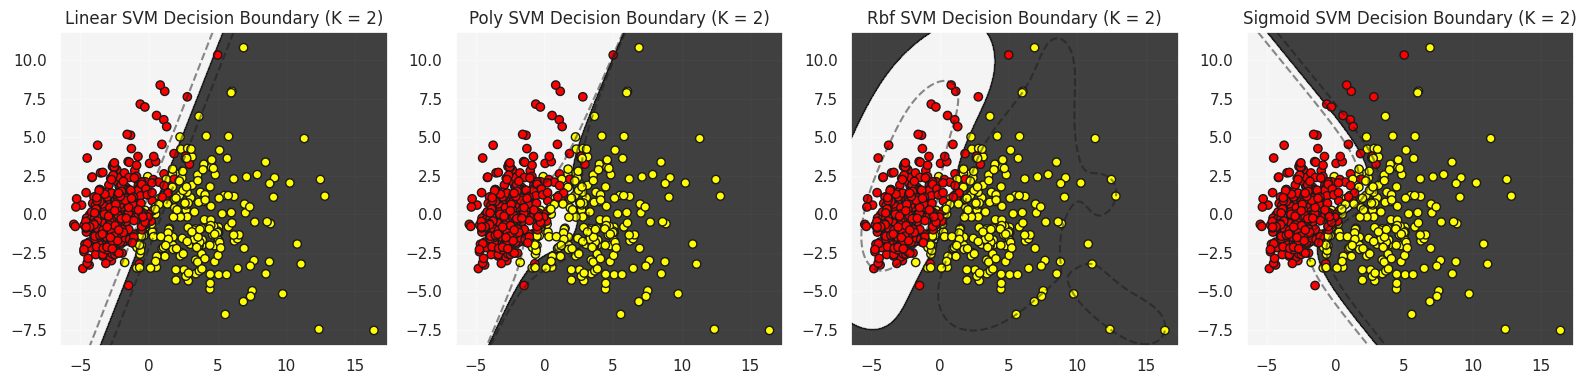

In [ ]:
# define the plot_svc_decision_function function
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# PCA with 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# split data 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

plt.figure(figsize=(16, 4))

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i, kernel in enumerate(kernels, 1):
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)

    plt.subplot(1, 4, i)
    h = .02
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='Greys', alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='autumn', edgecolors='k')
    plt.title(f'{kernel.capitalize()} SVM Decision Boundary (K = 2)')

    # plot decision boundary and margin lines
    plt.contour(xx, yy, svc.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()

## **Problem 2**

**SVR Regression Model**

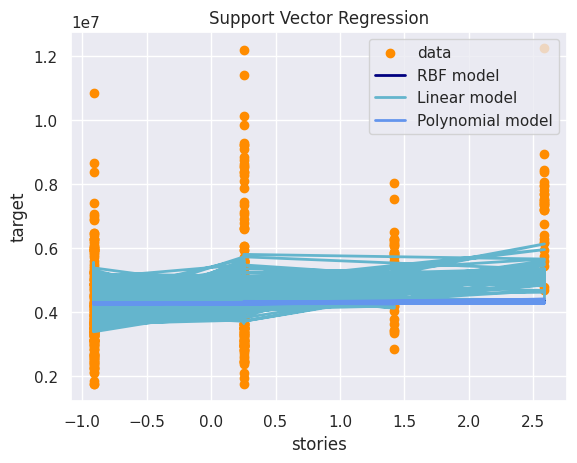

In [ ]:
file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.read_csv(file_path)

# list of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing = housing.drop('furnishingstatus', axis=1)

# define input features (X) and target variable (y)
x = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
y = housing['price']

# split data 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(housing[x], y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit regression models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)
y_lin = svr_lin.fit(X_train, y_train).predict(X_train)
y_poly = svr_poly.fit(X_train, y_train).predict(X_train)

# plot single feature at a time
feature_to_plot = 'stories'
X_feature = X_train[:, X.index(feature_to_plot)]

lw = 2
plt.scatter(X_feature, y_train, color='darkorange', label='data')
plt.plot(X_feature, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X_feature, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X_feature, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel(feature_to_plot)
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

**PCA feature extractionb & determing optimal K value**

In [145]:
# range of K values to test
K_values = range(1, 5)
best_K = None
best_mse = float('inf')

for K in K_values:
    # PCA with K components
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # fit SVR model with RBF kernel
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    y_rbf = svr_rbf.fit(X_train_pca, y_train).predict(X_test_pca)

    mse = mean_squared_error(y_test, y_rbf)

    if mse < best_mse:
        best_mse = mse
        best_K = K

print(f"The optimal number of principal components is {best_K} with MSE: {best_mse:.2f}")

The optimal number of principal components is 1 with MSE: 5316277647656.21


**Kernel tricks to capture non-linearities**


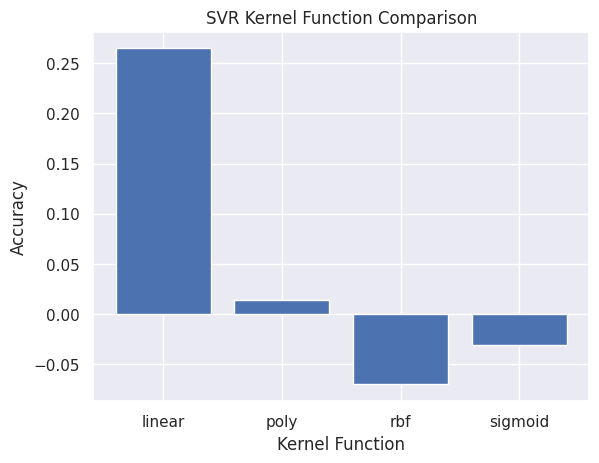

In [144]:
# list of kernel functions to explore
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

for kernel in kernels:
    svr = SVR(kernel=kernel, C=1e3)
    svr.fit(X_train_pca, y_train)
    y_pred = svr.predict(X_test_pca)
    accuracy = svr.score(X_test_pca, y_test)
    kernel_accuracies.append((kernel, accuracy))

# plot of results and kernel accuracies
kernel_names, accuracies = zip(*kernel_accuracies)
plt.bar(kernel_names, accuracies)
plt.xlabel('Kernel Function')
plt.ylabel('Accuracy')
plt.title('SVR Kernel Function Comparison')
plt.show()
